# Exercise 5.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

**Simple Network**

We continue with the dataset first encountered in the previous exercise. Please refer to the discussion there for an introduction to the data and the learning objective.

Here, we manually implement a simple network architecture

In [2]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (the !wget command will work either way assuming
# you are on a unix-based machine and have wget installed)
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

File ‘winequality-white.csv’ already there; not retrieving.



In [3]:


# Before working with the data,
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt("winequality-white.csv", delimiter=";", skip_header=1)

print(f"{data.shape = }")

# Prepare for proper training
rng = np.random.default_rng(1234)
rng.shuffle(data)  # randomly sort examples

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000, :11]  # all features except last column
y_train = data[:3000, 11]  # quality column

# and the remaining examples for testing
X_test = data[3000:, :11]  # all features except last column
y_test = data[3000:, 11]  # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data.shape = (4898, 12)
First example:
Features: [6.8000e+00 1.9000e-01 7.1000e-01 1.7500e+01 4.2000e-02 2.1000e+01
 1.1400e+02 9.9784e-01 2.8500e+00 5.0000e-01 9.5000e+00]
Quality: 6.0


# Problems

The goal is to implement the training of a neural network with one input layer, one hidden layer, and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one data point to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple data points and even over several epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [4]:
# Initialise weights with suitable random distributions
hidden_nodes = 50  # number of nodes in the hidden layer
n_inputs = 11  # input features in the dataset

W = rng.standard_normal(size=(hidden_nodes, 11)) * np.sqrt(2.0 / n_inputs)
b = rng.standard_normal(size=hidden_nodes) * np.sqrt(2.0 / n_inputs)
Wp = rng.standard_normal(size=hidden_nodes) * np.sqrt(2.0 / hidden_nodes)
bp = rng.standard_normal(size=(1))

print(f"{W.shape = }")

W.shape = (50, 11)


In [5]:
# You can use this implementation of the ReLu activation function
def relu(x: np.ndarray) -> np.ndarray:
    """Simple implementation of a rectified linear unit.

    Parameters
    ----------
    x : array_like
        Array of input features.

    Returns
    -------
    np.ndarray
        Array containig function values of the relu for
        each element of the input array.
    """
    return np.maximum(x, 0)

In [6]:
def dnn(
    x: np.ndarray,
    W: np.ndarray,
    b: np.ndarray,
    Wp: np.ndarray,
    bp: np.ndarray,
) -> np.ndarray:
    """Simple DNN.

    Parameters
    ----------
    x : array_like
        Array of input features.
    W : array_like
        Array of input layer weights.
    b : array_like
        Array of input layer biases.
    Wp : array__like
        Array of output layer weighs.
    bp : array_like
        Array of output layer biases

    Returns
    -------
    np.ndarray, shape (1,)
        Array containing the float output of the DNN.
    """
    # TODO Calculate and return network output of forward pass
    # See Hint 1 for additional information

    z = np.dot(W, x) + b
    a = relu(z)
    output = np.dot(Wp, a) + bp
    
    return output

In [7]:
def update_weights(
    x: np.ndarray,
    y: np.ndarray,
    W: np.ndarray,
    b: np.ndarray,
    Wp: np.ndarray,
    bp: np.ndarray,
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Updates weights for given inputs, targets,
    weights, and biases.

    Parameters
    ----------
    x : array_like
        Array of input features.
    y : array_like
        Array of target features.
    W : array_like
        Array of input layer weights.
    b : array_like
        Array of input layer biases.
    Wp : array__like
        Array of output layer weighs.
    bp : array_like
        Array of output layer biases

    Returns
    -------
    tuple
        Tuple of updated weight and bias arrays.
    """

    learning_rate = 0.0001; # TODO: choose a suitable learning rate

    # TODO: Calculate the network output (use the function dnn defined above)

    # TODO: Derive the gradient for each of W,b,Wp,bp by taking the partial
    # derivative of the loss function with respect to the variable and
    # then implement the resulting weight-update procedure
    # See Hint 2 for additional information

    # You might need these numpy functions:
    # np.dot, np.outer, np.heaviside
    # Hint: Use .shape and print statements to make sure all operations
    # do what you want them to

    # TODO: Update the weights/bias following the rule:  weight_new = weight_old - learning_rate * gradient

    output = dnn(x, W, b, Wp, bp)

    db  = 2 * (output - y)
    dWp = db * relu(np.dot(W, x) + b)
    dbp = db * Wp * np.heaviside(relu(np.dot(W, x) + b), 0)
    dW  = np.outer(dbp, x)

    b_new = b - learning_rate * db
    bp_new = bp - learning_rate * dbp
    W_new = W - learning_rate * dW
    Wp_new = Wp - learning_rate * dWp

    return W_new, b_new, Wp_new, bp_new # return the new weights

# Training loop and evaluation below

In [8]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above,
# you should not need to change anything below.
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
# This will just train for one epoch
# You will want a higher number once everything works
n_epochs = 100

# Loop over the epochs
for ep in range(n_epochs):
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        W, b, Wp, bp = update_weights(x, y, W, b, Wp, bp)

    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x, W, b, Wp, bp)[0] for x in X_train]
    y_pred = [dnn(x, W, b, Wp, bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = np.sum((y_pred_train - y_train) ** 2) / y_train.shape[0]
    test_loss = np.sum((y_pred - y_test) ** 2) / y_test.shape[0]

    # print some information
    print("Epoch:", ep, "Train Loss:", train_loss, "Test Loss:", test_loss)

    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Epoch: 0 Train Loss: 0.9973422258480781 Test Loss: 1.003962356871122
Epoch: 1 Train Loss: 0.7321027129325208 Test Loss: 0.733113511119776
Epoch: 2 Train Loss: 0.7028206962285817 Test Loss: 0.7171734785861757
Epoch: 3 Train Loss: 0.6501786201650943 Test Loss: 0.6609459503241395
Epoch: 4 Train Loss: 0.6501653493883097 Test Loss: 0.6581286482735004
Epoch: 5 Train Loss: 0.6520858929200583 Test Loss: 0.6615070795998783
Epoch: 6 Train Loss: 0.6545514250424326 Test Loss: 0.6649819705121459
Epoch: 7 Train Loss: 0.6543703341367436 Test Loss: 0.6692289899135956
Epoch: 8 Train Loss: 0.6581221221399748 Test Loss: 0.6743287805846856
Epoch: 9 Train Loss: 0.6596793734237488 Test Loss: 0.6773699989749211
Epoch: 10 Train Loss: 0.6641774594095348 Test Loss: 0.6844250678603476
Epoch: 11 Train Loss: 0.6675388626392468 Test Loss: 0.6902013813609685
Epoch: 12 Train Loss: 0.668147466339206 Test Loss: 0.69379235158476
Epoch: 13 Train Loss: 0.6757462597686973 Test Loss: 0.7051632468996548
Epoch: 14 Train Loss:

Best loss: 0.6581286482735004 Final loss: 0.7212521303468906
Correlation coefficient: 0.4857414614180802


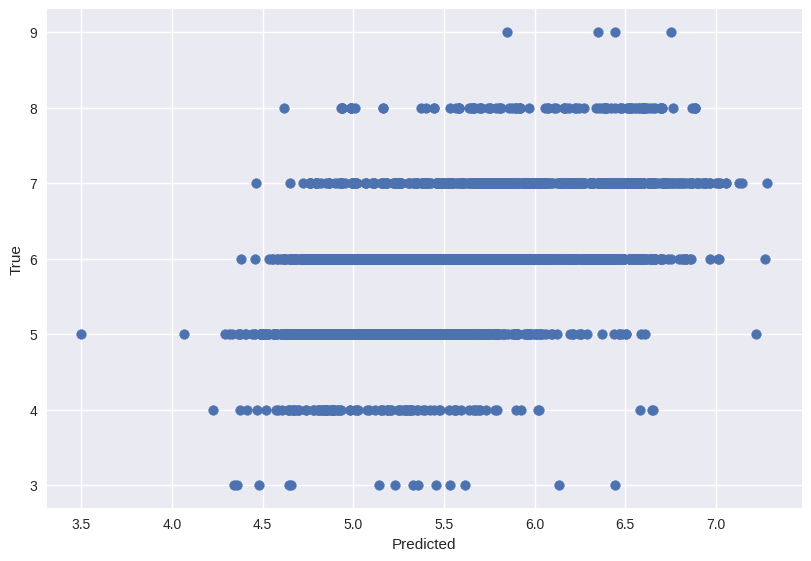

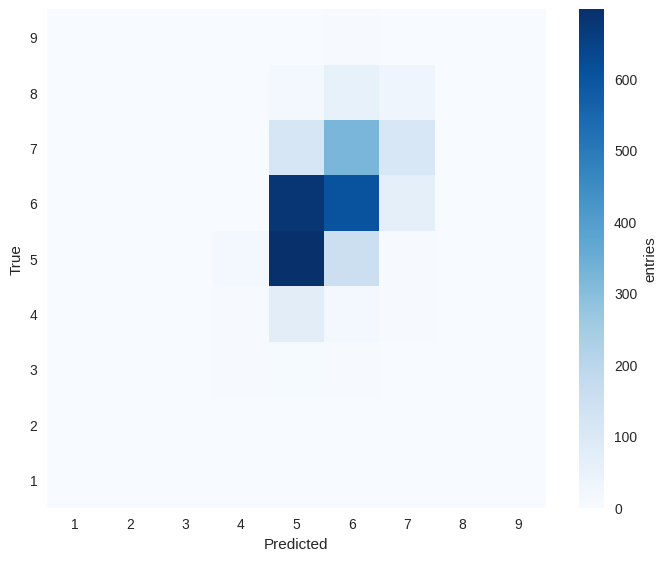

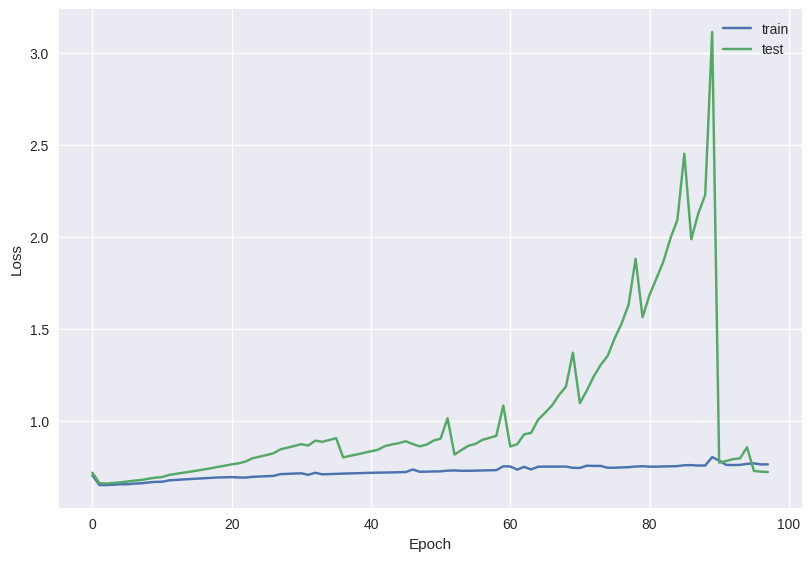

In [9]:
# After the training:

# Prepare scatter plot
y_pred = [dnn(x, W, b, Wp, bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred, y_test)[0, 1])
fig, ax = plt.subplots(layout="constrained")
ax.scatter(y_pred_train, y_train)
ax.set(
    xlabel="Predicted",
    ylabel="True",
)

fig, ax = plt.subplots(layout="constrained")
h = ax.hist2d(
    y_pred_train,
    y_train,
    bins=[np.arange(0.5, 10.5, 1), np.arange(0.5, 10.5, 1)],
    cmap="Blues",
)

ax.set(
    xlabel="Predicted",
    ylabel="True",
    aspect="equal",
)

cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("entries")


# Prepare and loss over time
fig, ax = plt.subplots(layout="constrained")
ax.plot(train_losses[2:], label="train")
ax.plot(
    test_losses[2:], label="test"
)  # we omit the first data points as the first loss is typically very high which makes it difficult to read the plot.
ax.legend()
ax.set(
    xlabel="Epoch",
    ylabel="Loss",
);

# Hint 1

We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads:
$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

# Hint 2

For the regression problem the objective function is the mean squared error between the prediction and the true label $y$:
$$
L=(\hat{y}-y)^{2}
$$

Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:

$$
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{m k}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{m i} x_{i}+b_{m}\right) x_{k}
\end{aligned}
$$

Here, $\Theta$ denotes the Heaviside step function.